# Модели за динамика на популација
### Содржина

* [I. Логистичка равенка - Пандемија на SARS-CoV-2 во Народна Република Кина](#chapter1)
* [II. Модел за интерспециска конкуренција - Експеримент на Gause со Paramecium](#chapter2)
    * [II.1 Интраспециска конкуренција на P. aurelia и P. caudatum](#section_2_1)
    * [II.2 Интерспециска конкуренција на P. aurelia и P. caudatum](#section_2_2)
* [III. Модел за предаторство - Hudson Bay Company](#chapter3)
    * [III.1 Анализа на податоци](#section_3_1)
    * [III.2 Симулација на системот](#section_3_2)

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, minimize, minimize_scalar, least_squares
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### I. Логистичка равенка - Пандемија на SARS-CoV-2 во Народна Република Кина <a class="anchor" id="chapter1"></a>
Од почетокот на пандемијата (31.12.2019) до 23.10.2020

In [2]:
# Fitting function
def logistic_growth(t, K, r, N0):
    return K / (1 + ((K-N0)/N0)*np.exp(-r*t))

In [3]:
covid19 = pd.read_csv('owid-covid-data.csv')
china = covid19[covid19['location'] == 'China']
china.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
8891,CHN,Asia,China,2019-12-31,27.0,27.0,NaN,NaN,0.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
8892,CHN,Asia,China,2020-01-01,27.0,0.0,NaN,NaN,0.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
8893,CHN,Asia,China,2020-01-02,27.0,0.0,NaN,NaN,0.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
8894,CHN,Asia,China,2020-01-03,44.0,17.0,NaN,NaN,0.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
8895,CHN,Asia,China,2020-01-04,44.0,0.0,NaN,NaN,0.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


In [4]:
china.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9184,CHN,Asia,China,2020-10-19,90972.0,17.0,22.857,4739.0,0.0,0.0,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
9185,CHN,Asia,China,2020-10-20,91006.0,34.0,25.143,4739.0,0.0,0.0,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
9186,CHN,Asia,China,2020-10-21,91022.0,16.0,23.429,4739.0,0.0,0.0,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
9187,CHN,Asia,China,2020-10-22,91044.0,22.0,25.000,4739.0,0.0,0.0,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
9188,CHN,Asia,China,2020-10-23,91073.0,29.0,24.000,4739.0,0.0,0.0,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


[8.589484e+04 1.940000e-01 2.944400e+01]


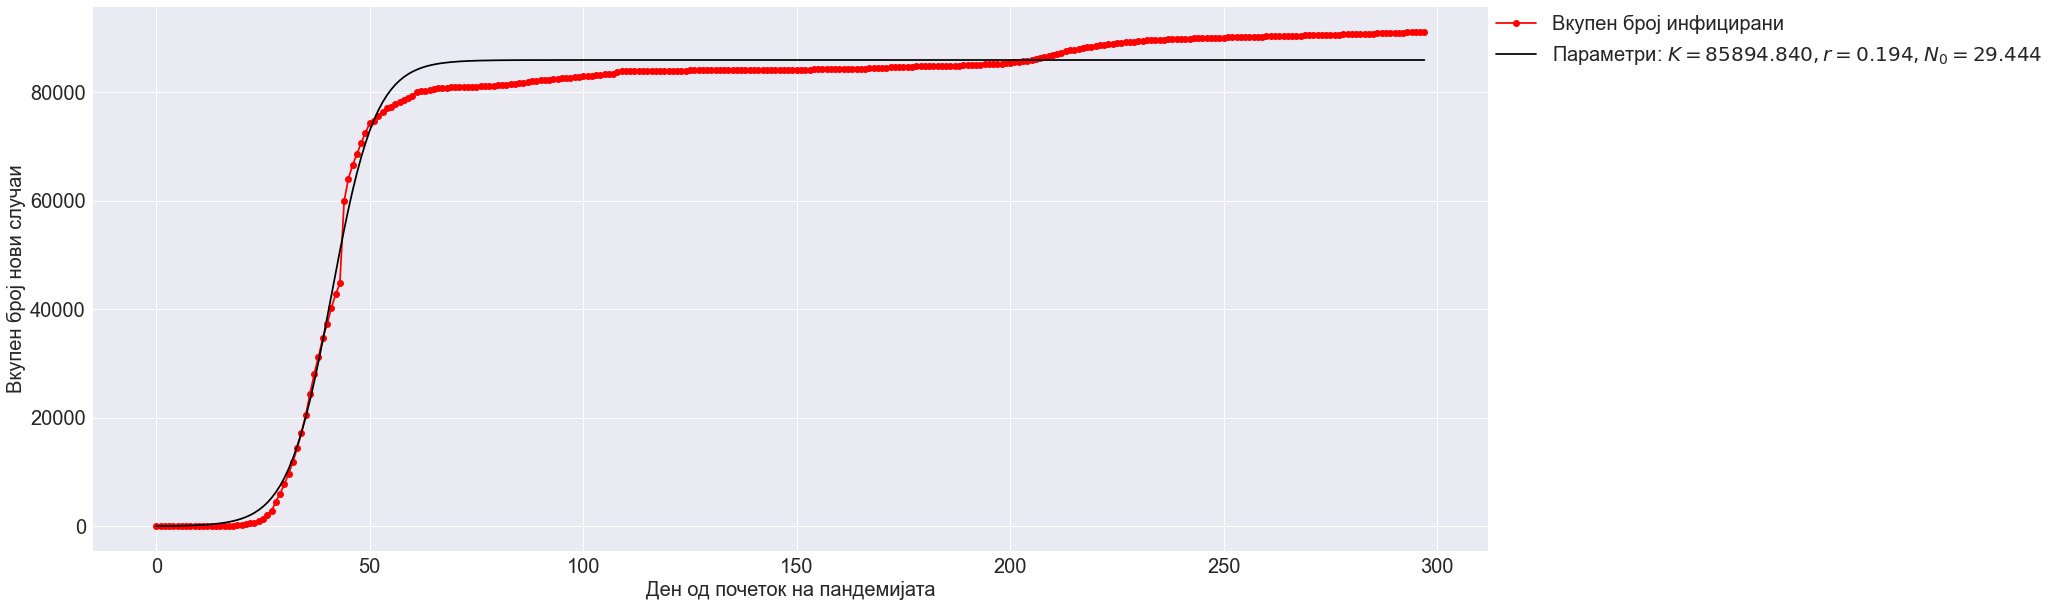

In [5]:
day = np.arange(0,china.shape[0],1)

# Initial guess for the parameters
initialGuess = [china['total_cases'].iloc[-1],1,1]    
 
# Perform the curve-fit
poptChina, pcovChina = curve_fit(logistic_growth, day, china['total_cases'], initialGuess)
poptChina = np.round(poptChina,3)
print(poptChina)

fig, ax = plt.subplots(figsize=(25,10))
ax.plot(np.arange(0,china.shape[0],1), china['total_cases'], 'ro-', label='Вкупен број инфицирани')
ax.plot(day, logistic_growth(day, *poptChina), 'k-', label='Параметри: $K=%5.3f, r=%5.3f, N_0=%5.3f$' % tuple(poptChina))
plt.xlabel('Ден од почеток на пандемијата', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Вкупен број нови случаи', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

### II. Модел за интерспециска конкуренција - Експеримент на Gause со Paramecium <a class="anchor" id="chapter2"></a>
#### II.1 Интраспециска конкуренција на P. aurelia и P. caudatum <a class="anchor" id="section_2_1"></a>

In [6]:
pr = pd.read_csv('paramecium_data.txt', '\t')
pr

,Time,P. aurelia,P. caudatum,P. aurelia competition,P. caudatum competition
0,0,2.0,2,2,2.0
1,1,3.0,5,4,8.0
2,2,29.0,22,29,20.0
3,3,92.0,16,66,25.0
4,4,173.0,39,141,24.0
5,5,210.0,52,162,NaN
6,6,210.0,54,219,NaN
7,7,240.0,47,153,NaN
8,8,NaN,50,162,21.0
9,9,NaN,26,150,15.0


In [7]:
pr['P. aurelia'] = pr['P. aurelia'].interpolate(method='nearest')
pr['P. caudatum competition'] = pr['P. caudatum competition'].interpolate(method='nearest')

In [8]:
pr

,Time,P. aurelia,P. caudatum,P. aurelia competition,P. caudatum competition
0,0,2.0,2,2,2.0
1,1,3.0,5,4,8.0
2,2,29.0,22,29,20.0
3,3,92.0,16,66,25.0
4,4,173.0,39,141,24.0
5,5,210.0,52,162,24.0
6,6,210.0,54,219,24.0
7,7,240.0,47,153,21.0
8,8,240.0,50,162,21.0
9,9,240.0,26,150,15.0


[94.687  1.261  1.26 ]


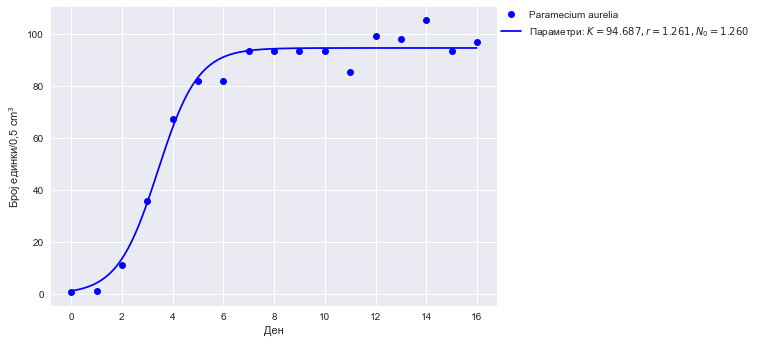

In [9]:
# Experimental data
xData = pr['Time']
yDataAurelia = 0.39 * pr['P. aurelia']
 
# Plot experimental data points
plt.plot(xData, yDataAurelia, 'bo', label='Paramecium aurelia')
 
# Initial guess for the parameters
initialGuess = [yDataAurelia.iloc[-1],1,1]    
 
# Perform the curve-fit
poptAurelia, pcovAurelia = curve_fit(logistic_growth, xData, yDataAurelia, initialGuess)
poptAurelia = np.round(poptAurelia,3)
print(poptAurelia)
 
# x values for the fitted function
xFit = np.arange(0.0,16.0,0.01)
 
# Plot the fitted function
plt.plot(xFit, logistic_growth(xFit, *poptAurelia), 'b', label='Параметри: $K=%5.3f, r=%5.3f, N_0=%5.3f$' % tuple(poptAurelia))
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

[54.882  0.901  2.979]


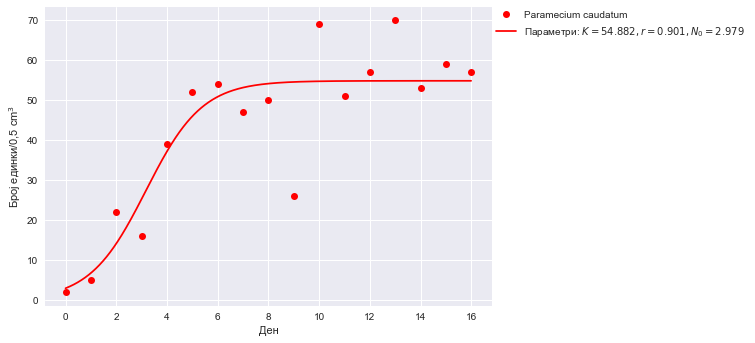

In [10]:
# Experimental data
xData = pr['Time']
yDataCaudatum = pr['P. caudatum']
 
# Plot experimental data points
plt.plot(xData, yDataCaudatum, 'ro', label='Paramecium caudatum')
 
# Initial guess for the parameters
initialGuess = [yDataCaudatum.iloc[-1],1,1]    
 
# Perform the curve-fit
poptCaudatum, pcovCaudatum = curve_fit(logistic_growth, xData, yDataCaudatum, initialGuess)
poptCaudatum = np.round(poptCaudatum,3)
print(poptCaudatum)
 
# x values for the fitted function
xFit = np.arange(0.0,16.0,0.01)
 
# Plot the fitted function
plt.plot(xFit, logistic_growth(xFit, *poptCaudatum), 'r', label='Параметри: $K=%5.3f, r=%5.3f, N_0=%5.3f$' % tuple(poptCaudatum))
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

#### II.2 Интерспециска конкуренција на P. aurelia и P. caudatum <a class="anchor" id="section_2_2"></a>

In [11]:
x_exp = 0.39 * pr['P. aurelia competition'].values
y_exp = pr['P. caudatum competition'].values
t_exp = pr['Time'].values

[1.261 0.013 0.018 0.901 0.012 0.016]


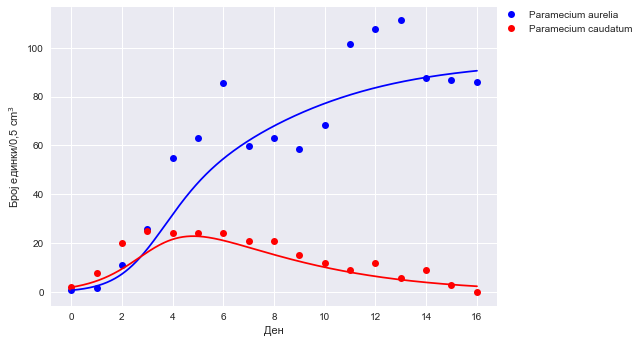

In [12]:
# model parameters
L = poptAurelia[1]                        # L
A = poptAurelia[1]/poptAurelia[0]         # A
B = 1.35*poptAurelia[1]/poptAurelia[0]    # B 
M = poptCaudatum[1]                       # M
C = 0.75*poptCaudatum[1]/poptCaudatum[0]  # C 
D = poptCaudatum[1]/poptCaudatum[0]       # D
params = np.round([L, A, B, M, C, D],3)
print(params)
dt = 0.01; max_time = t_exp[-1]

# initial time and populations
t_el = t_exp[0]; x_el = x_exp[0]; y_el = y_exp[0]

# empty lists in which to store time and populations
t_calc = []; x_calc = []; y_calc = []

# initialize lists
t_calc.append(t_el); x_calc.append(x_el); y_calc.append(y_el)

while t_el < max_time:
    # calc new values for t_el, x_el, y_el
    t_el = t_el + dt
    x_el = x_el + x_el*(L - A*x_el - B*y_el)*dt
    y_el = y_el + y_el*(M - C*x_el - D*y_el)*dt
    
    # store new values in lists
    t_calc.append(t_el)
    x_calc.append(x_el)
    y_calc.append(y_el)

# Experimental data
plt.plot(t_exp, x_exp, 'bo', label='Paramecium aurelia')
plt.plot(t_exp, y_exp, 'ro', label='Paramecium caudatum')
plt.plot(t_calc, x_calc, 'b-')
plt.plot(t_calc, y_calc, 'r-')
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

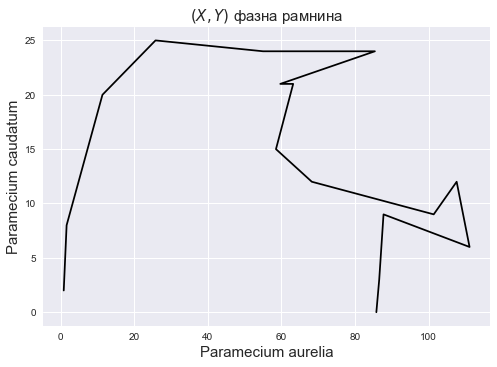

In [13]:
plt.plot(x_exp, y_exp, 'k-')
plt.xlabel('Paramecium aurelia', fontsize=15)
plt.ylabel('Paramecium caudatum', fontsize=15)
plt.title('$(X,Y)$ фазна рамнина', fontsize=15)
plt.show()

### III. Модел за предаторство - Hudson Bay Company <a class="anchor" id="chapter3"></a>
#### III.1 Анализа на податоци <a class="anchor" id="section_3_1"></a>

In [14]:
lv = pd.read_excel('hare_lynx_data.xlsx')
lv.head()

,Unnamed: 0,Number (in thousands),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,Hare,Lynx,NaN,http://people.whitman.edu/~hundledr/courses/M2...
1,1845,19.58,30.09,NaN,NaN
2,1846,19.6,45.15,NaN,NaN
3,1847,19.61,49.15,NaN,NaN
4,1848,11.99,39.52,NaN,NaN


In [15]:
lv = lv.iloc[1:, 0:3]
lv.columns = ['Year', 'Hare', 'Lynx']
lv.head()

,Year,Hare,Lynx
1,1845,19.58,30.09
2,1846,19.6,45.15
3,1847,19.61,49.15
4,1848,11.99,39.52
5,1849,28.04,21.23


In [16]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 1 to 91
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    91 non-null     object
 1   Hare    91 non-null     object
 2   Lynx    91 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [17]:
lv['Year'] = lv.Year.astype('int')
lv['Hare'] = lv.Hare.astype('float')
lv['Lynx'] = lv.Lynx.astype('float')

In [18]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 1 to 91
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    91 non-null     int32  
 1   Hare    91 non-null     float64
 2   Lynx    91 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.9 KB


In [19]:
lv.to_csv('hare_lynx_data.csv', index=False)

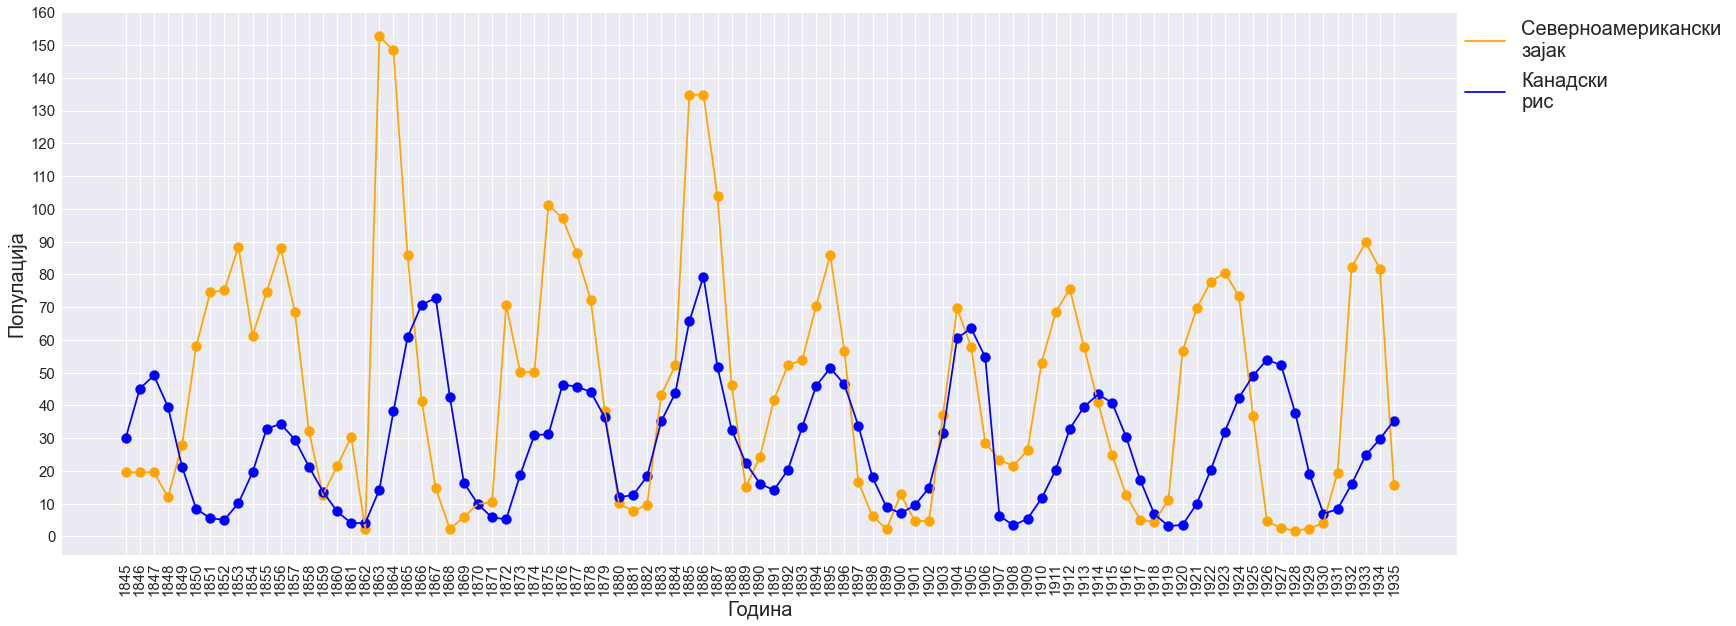

In [20]:
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(lv['Year'], lv['Hare'], c='orange', label='Северноамерикански\nзајак')
ax.plot(lv['Year'], lv['Lynx'], c='blue', label='Канадски\nрис')
ax.scatter(lv['Year'], lv['Hare'], c='orange', s=100)
ax.scatter(lv['Year'], lv['Lynx'], c='blue', s=100)
ax.set_xlabel('Година', fontsize=20)
ax.set_xticks(lv['Year'])
ax.set_xticklabels(lv['Year'], rotation='vertical', fontsize=15)
ax.set_ylabel('Популација', fontsize=20)
ax.set_yticks(np.linspace(0, 160, 17).astype('int'))
ax.set_yticklabels(np.linspace(0, 160, 17).astype('int'), fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

#### III.2 Симулација на системот <a class="anchor" id="section_3_2"></a>

In [21]:
def f_dot(x,h):
    x_dot = np.zeros_like(x)
    for k in range(1,len(x)-1):
        x_dot[k] = (1/x[k])*(x[k+h]-x[k-h])/2*h
    # End points
    x_dot[0]  = (1/x[0])*(x[1] - x[0])/h
    x_dot[-1] = (1/x[0])*(x[-1] - x[-2])/h
    return x_dot

In [22]:
hare = f_dot(lv['Hare'].values,h=1)
lynx = f_dot(lv['Lynx'].values,h=1)

In [23]:
p1 = np.polyfit(hare,lv['Lynx'].values,1)
p1 = np.round(p1, 3)
p1

array([-1.583, 28.791])

In [24]:
p2 = np.polyfit(lv['Hare'].values,lynx,1)
p2 = np.round(p2, 3)
p2

array([ 0.007, -0.327])

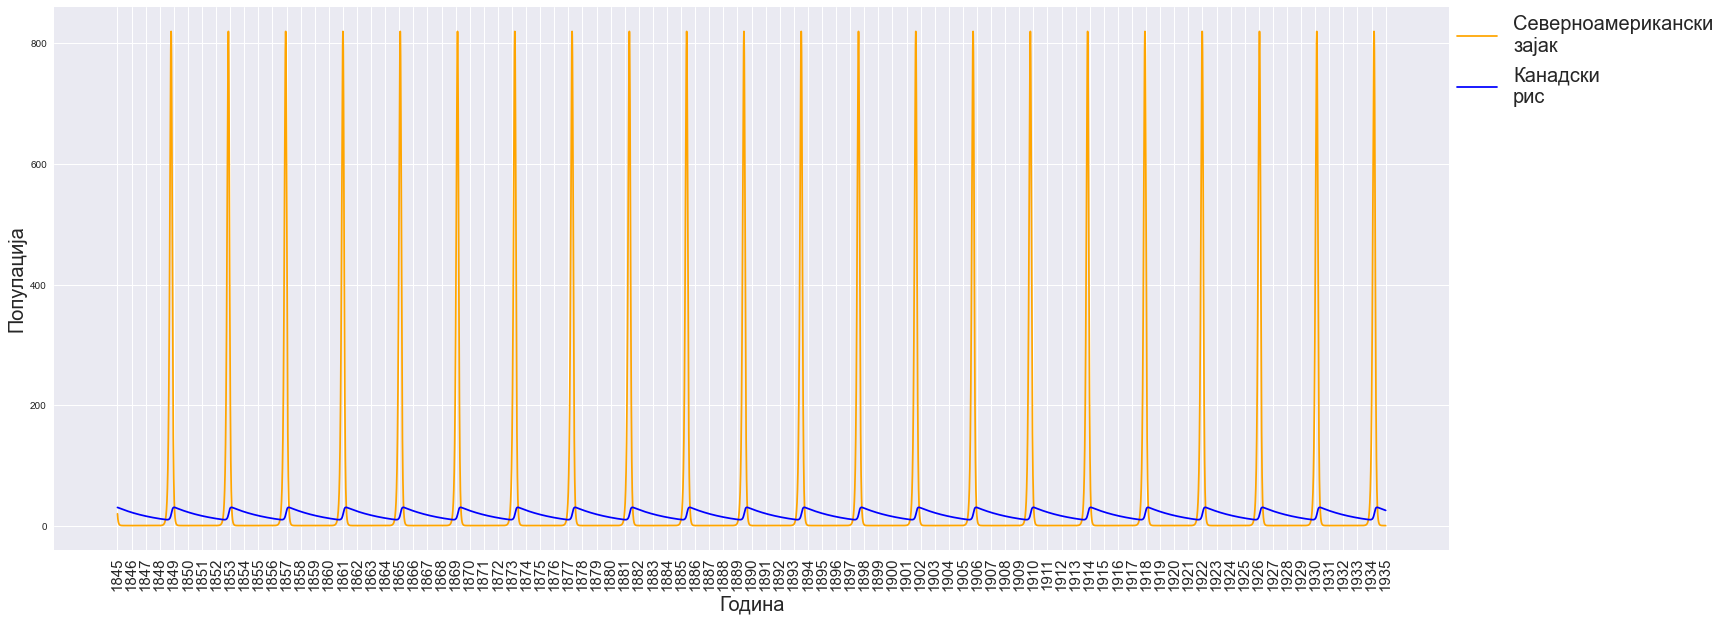

In [25]:
# model parameters
a = p1[1]; b = p1[0]; c = p2[1];  d = p2[0]
dt = 0.001; max_time = lv['Year'].iloc[-1]

# initial time and populations
t = lv['Year'].iloc[0]; x = lv['Hare'].iloc[0]; y = lv['Lynx'].iloc[0]

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + (a*x + b*x*y)*dt
    y = y + (c*y + d*x*y)*dt

    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

fig, ax = plt.subplots(figsize=(25,10))
ax.plot(t_list, x_list, c='orange', label='Северноамерикански\nзајак')
ax.plot(t_list, y_list, c='blue', label='Канадски\nрис')
ax.set_xlabel('Година', fontsize=20)
ax.set_xticks(lv['Year'])
ax.set_xticklabels(lv['Year'], rotation='vertical', fontsize=15)
ax.set_ylabel('Популација', fontsize=20)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

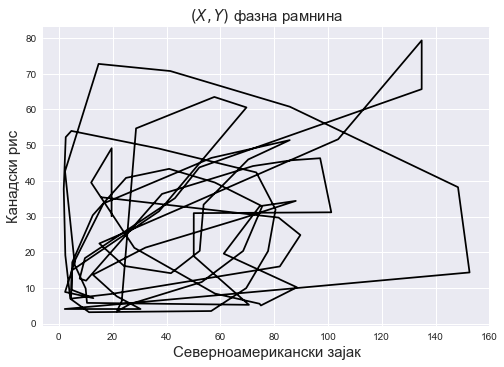

In [29]:
plt.plot(lv['Hare'], lv['Lynx'], 'k-')
plt.xlabel('Северноамерикански зајак', fontsize=15)
plt.ylabel('Канадски рис', fontsize=15)
plt.title('$(X,Y)$ фазна рамнина', fontsize=15)
plt.show()